# **This notebook is for feature weight training.**
**- The best solution is from Logistic Regression**

# 1. Data Preprocessing

In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [63]:
trans_network = pd.read_csv('../Annotated_dataset/transaction_network_data_all.csv', sep=',')
trans_network.head()

,itemID_i,itemID_j,weight,language,author,title,main_topic,age
0,14576,17731,6,1.0,1.0,1.335705,0.175094,0.0000
1,14576,4753,1,1.0,0.0,0.000000,0.000000,-0.9125
2,14576,50523,2,1.0,0.0,0.000000,0.000000,-0.9125
3,14576,6540,1,0.0,0.0,0.000000,0.000000,-0.0125
4,14576,72731,1,0.0,0.0,0.000000,0.000000,-0.9125


In [64]:
network_data = trans_network.copy()
print(len(network_data))

303666


In [65]:
#remove data which main topic is nan
network_data.dropna(subset = ["main_topic"], inplace=True)
print(len(network_data))
network_data.head()

301349


,itemID_i,itemID_j,weight,language,author,title,main_topic,age
0,14576,17731,6,1.0,1.0,1.335705,0.175094,0.0000
1,14576,4753,1,1.0,0.0,0.000000,0.000000,-0.9125
2,14576,50523,2,1.0,0.0,0.000000,0.000000,-0.9125
3,14576,6540,1,0.0,0.0,0.000000,0.000000,-0.0125
4,14576,72731,1,0.0,0.0,0.000000,0.000000,-0.9125


In [66]:
#calculate age closeness
network_data['age_closeness'] = 1 - abs(network_data['age'])
network_data.head()

,itemID_i,itemID_j,weight,language,author,title,main_topic,age,age_closeness
0,14576,17731,6,1.0,1.0,1.335705,0.175094,0.0000,1.0000
1,14576,4753,1,1.0,0.0,0.000000,0.000000,-0.9125,0.0875
2,14576,50523,2,1.0,0.0,0.000000,0.000000,-0.9125,0.0875
3,14576,6540,1,0.0,0.0,0.000000,0.000000,-0.0125,0.9875
4,14576,72731,1,0.0,0.0,0.000000,0.000000,-0.9125,0.0875


In [67]:
#remove title outlier 
print(network_data.loc[network_data['title'] > 50])
network_data = network_data.loc[network_data['title'] < 50]
len(network_data)

        itemID_i  itemID_j  weight  language  author      title  main_topic  \
228842      9231     44709       1       1.0     0.0  75.604972    0.405403   

        age  age_closeness  
228842  0.0            1.0  


301348

In [68]:
#remove weight outlier
print(network_data.loc[network_data['weight'] > 200])
network_data = network_data.loc[network_data['weight'] < 200]
len(network_data)

      itemID_i  itemID_j  weight  language  author  title  main_topic  age  \
3890     46998      2253     243       0.0     1.0    0.0    0.256717  0.0   

      age_closeness  
3890            1.0  


301347

In [69]:
#title normalization
network_data['title'] = (network_data['title'] - network_data['title'].min()) / (network_data['title'].max() - network_data['title'].min())
network_data.head()

,itemID_i,itemID_j,weight,language,author,title,main_topic,age,age_closeness
0,14576,17731,6,1.0,1.0,0.03094,0.175094,0.0000,1.0000
1,14576,4753,1,1.0,0.0,0.00000,0.000000,-0.9125,0.0875
2,14576,50523,2,1.0,0.0,0.00000,0.000000,-0.9125,0.0875
3,14576,6540,1,0.0,0.0,0.00000,0.000000,-0.0125,0.9875
4,14576,72731,1,0.0,0.0,0.00000,0.000000,-0.9125,0.0875


In [70]:
network_data.describe()

,itemID_i,itemID_j,weight,language,author,title,main_topic,age,age_closeness
count,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000
mean,39132.884386,39426.727042,1.408479,0.633074,0.069846,0.004201,0.332994,-0.003729,0.735848
std,22643.635041,22515.516846,2.470508,0.481967,0.254888,0.019684,0.363276,0.480855,0.401820
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,19458.000000,20354.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.012500,0.125000
50%,38902.000000,39394.000000,1.000000,1.000000,0.000000,0.000000,0.211067,0.000000,0.987500
75%,58765.000000,58691.000000,1.000000,1.000000,0.000000,0.000000,0.518656,0.012500,1.000000
max,79066.000000,79066.000000,191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.1 Classifying Weight Value into 20 Groups Based on Weight Value

In [71]:
network_data['weight'].value_counts()

1      256592
2       26161
3        7716
4        3610
5        2020
        ...  
95          1
96          1
97          1
98          1
191         1
Name: weight, Length: 115, dtype: int64

In [72]:
network_data_1 = network_data[network_data['weight'] == 1]
network_data_2 = network_data[network_data['weight'] == 2]
network_data_3 = network_data[network_data['weight'] == 3]
network_data_4 = network_data[network_data['weight'] == 4]
network_data_5 = network_data[network_data['weight'] == 5]
network_data_6 = network_data[network_data['weight'] == 6]
network_data_7 = network_data[network_data['weight'] == 7]
network_data_8 = network_data[network_data['weight'] == 8]
network_data_9 = network_data[network_data['weight'] == 9]
network_data_10 = network_data[network_data['weight'] == 10]
network_data_11 = network_data[network_data['weight'] == 11]
network_data_12 = network_data[network_data['weight'] == 12]
network_data_13 = network_data[network_data['weight'] == 13]
network_data_14 = network_data[network_data['weight'] == 14]
network_data_15 = network_data[network_data['weight'] == 15]
network_data_16 = network_data[network_data['weight'] == 16]
network_data_17 = network_data[network_data['weight'] == 17]
network_data_18 = network_data[network_data['weight'] == 18]
network_data_19 = network_data[network_data['weight'] == 19]
network_data_20 = network_data[network_data['weight'] >= 20]

In [73]:
print(len(network_data_1))
print(len(network_data_2))
print(len(network_data_3))
print(len(network_data_4))
print(len(network_data_5))
print(len(network_data_6))
print(len(network_data_7))
print(len(network_data_8))
print(len(network_data_9))
print(len(network_data_10))
print(len(network_data_11))
print(len(network_data_12))
print(len(network_data_13))
print(len(network_data_14))
print(len(network_data_15))
print(len(network_data_16))
print(len(network_data_17))
print(len(network_data_18))
print(len(network_data_19))
print(len(network_data_20))

256592
26161
7716
3610
2020
1226
855
566
418
299
260
168
139
152
140
90
78
80
72
705


In [74]:
#give a value for each weight value
network_data_1['weight'] = 0.7
network_data_2['weight'] = 0.8
network_data_3['weight'] = 0.85
network_data_4['weight'] = 0.88
network_data_5['weight'] = 0.9
network_data_6['weight'] = 0.92
network_data_7['weight'] = 0.935
network_data_8['weight'] = 0.95
network_data_9['weight'] = 0.96
network_data_10['weight'] = 0.97
network_data_11['weight'] = 0.975
network_data_12['weight'] = 0.98
network_data_13['weight'] = 0.984
network_data_14['weight'] = 0.987
network_data_15['weight'] = 0.99
network_data_16['weight'] = 0.993
network_data_17['weight'] = 0.995
network_data_18['weight'] = 0.997
network_data_19['weight'] = 0.999
network_data_20['weight'] = 1.0

In [75]:
frames = [network_data_1, network_data_2, network_data_3, network_data_4, network_data_5, network_data_6, network_data_7, network_data_8, network_data_9, network_data_10, network_data_11, network_data_12, network_data_13, network_data_14, network_data_15, network_data_16, network_data_17, network_data_18, network_data_19, network_data_20]
network_data = pd.concat(frames)

In [16]:
network_data['weight'] = 1000 * network_data['weight']
#change data type from string to integer
network_data['weight'] = network_data['weight'].astype(int)

In [55]:
network_data['weight'].value_counts()

700     256592
800      26161
850       7716
880       3610
900       2020
920       1226
935        855
1000       705
950        566
960        418
970        299
975        260
980        168
987        152
990        140
984        139
993         90
997         80
995         78
999         72
Name: weight, dtype: int64

# 2. Find Suitable Feature Weight Using Different Models

## 2.1 Linear Regression Model

In [18]:
from sklearn import linear_model

features = ['author', 'main_topic', 'age_closeness', 'title']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values

ols = linear_model.LinearRegression()
model_R = ols.fit(X, y)

In [19]:
model_R.coef_

array([62.06318465,  7.28170339,  2.52664965, 65.38744968])

In [20]:
model_R.intercept_

711.605271474522

In [21]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model_R.score(X, y)

0.10037048954293348

Feature: author, Score: 62.06318
Feature: main_topic, Score: 7.28170
Feature: age_closeness, Score: 2.52665
Feature: title, Score: 65.38745


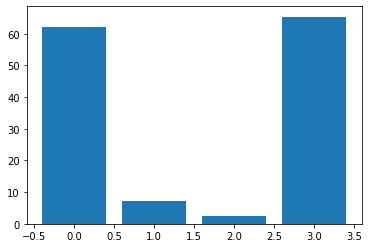

In [22]:
from matplotlib import pyplot

importance_R = model_R.coef_
# summarize feature importance
for i,v in zip(features, importance_R):
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_R))], importance_R)
pyplot.show()

## 2.2 Logistic Regression

Feature: author, Score: -2.53147
Feature: main_topic, Score: -0.48123
Feature: age_closeness, Score: -0.11004
Feature: title, Score: -2.36961


/Users/chihyenou/DM/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


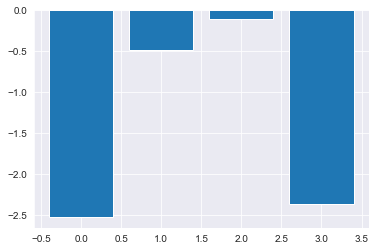

In [50]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

features = ['author', 'main_topic', 'age_closeness', 'title']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values

model_LR = LogisticRegression()
# fit the model
model_LR.fit(X, y)
# get importance
importance_LR = model_LR.coef_[0]
# summarize feature importance
for i,v in zip(features, importance_LR):
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_LR))], importance_LR)
pyplot.show()

In [51]:
model_LR.intercept_

array([ 6.77680827,  4.12041769,  2.67978096,  1.6957101 ,  1.19884176,
        0.52358734,  0.11620619, -0.15227873, -0.64564285, -0.78411531,
       -1.32117033, -1.30388671, -1.48890097, -1.74111163, -1.6461713 ,
       -1.93175921, -2.10816988, -2.17839237, -1.67644099, -0.13331202])

In [56]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model_LR.score(X, y)

0.8514702319916907

## 2.3 Random Forest

Feature: author, Score: 0.43986
Feature: main_topic, Score: 0.32761
Feature: age_closeness, Score: 0.12228
Feature: title, Score: 0.11024


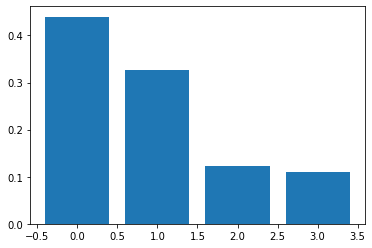

In [29]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
features = ['author', 'main_topic', 'age_closeness', 'title']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(features, importance):
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Text(0, 0.5, 'Importance Score')

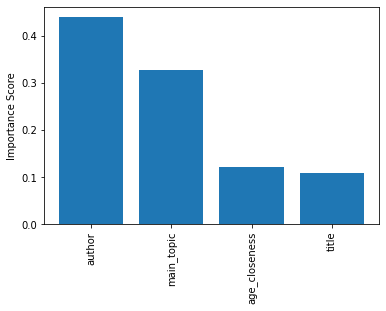

In [27]:
import numpy as np
import matplotlib.pyplot as plt

features = ['author', 'main_topic', 'age_closeness', 'title']
y_pos = np.arange(len(features))
y = [0.43945, 0.32826, 0.12226, 0.11002]

#plt.figure(dpi=150)
plt.bar(y_pos, y)
plt.xticks(y_pos, features, rotation=90)
plt.ylabel('Importance Score')

In [30]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model.score(X, y)

0.19814766136821638

## 2.4 Save the Logistic Regression Model (with highest R-squared)

In [58]:
import pickle

# save the model to disk
filename = '../Annotated_dataset/finalized_LR_model.sav'
pickle.dump(model_LR, open(filename, 'wb'))

In [59]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result)

0.8514702319916907


# 3. **Features' Correlation Matrix**

<AxesSubplot:>

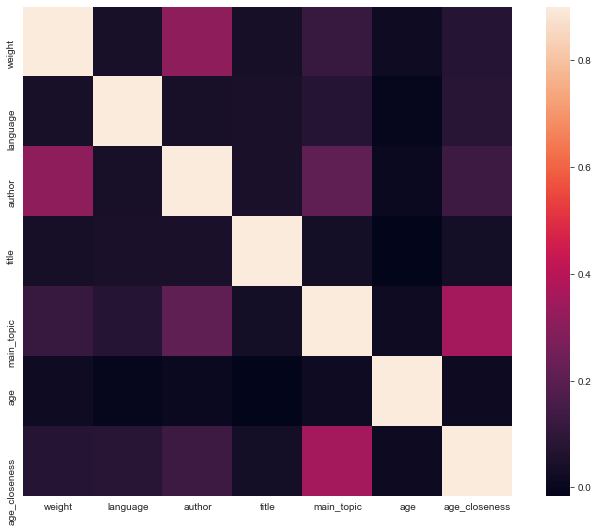

In [42]:
#From the correlation matrix, author has higher correlation with weight which means
#items with same author are more often bought together
#Besides, lanaguge and publisher_cluster is highly correlated.
#It is because that we group publisher_cluster based on language first, 
#then gave five sub-cluster for each language

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

corr_network = network_data.copy()
corr_network = corr_network.drop(columns=['itemID_i', 'itemID_j'])

corrmat = corr_network.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)